In [1]:
# Import libraries
# First let's import the packages I will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now I need to read in the data

path = '/Users/namhuynh/Desktop/3rd_PROJECT/movies.csv'
df = pd.read_csv(path)


In [2]:
# Let's look at the Data

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [4]:
# Let's see if there is any missing data

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# Replace missing value

## The missing in rating = Not Rated
df["rating"].replace(np.nan, 'Not Rated', inplace=True)

## The missing in budget, gross = avg
avg_budget = df["budget"].astype("float").mean(axis=0)
df["budget"].replace(np.nan, avg_budget, inplace=True)

avg_gross = df["gross"].astype("float").mean(axis=0)
df["gross"].replace(np.nan, avg_gross, inplace=True)

## The remaining missing data < 1% = drop
df.dropna(inplace=True)

df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [6]:
# change data type of columns

df['votes'] = df['votes'].astype('int64')

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')


In [7]:
# sort by gross

df = df.sort_values(by=['gross'], inplace=False, ascending=False)


In [8]:
# Drop duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,Not Rated,Comedy,2019,"January 11, 2019 (United States)",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0
2417,Madadayo,Not Rated,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


In [9]:
pd.set_option('display.max_rows', None)

<AxesSubplot:>

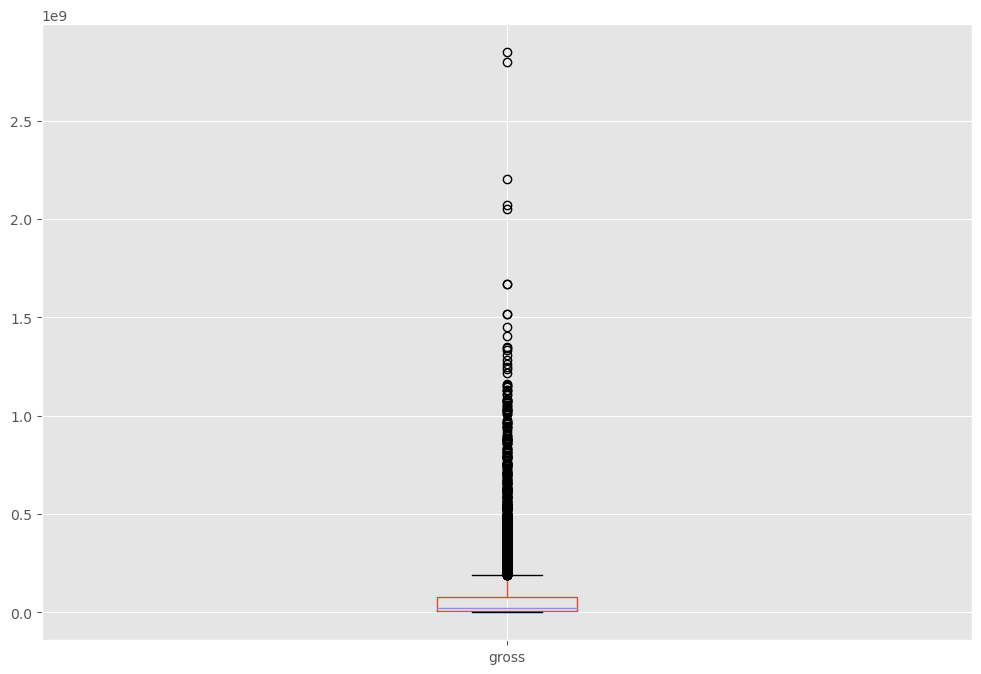

In [10]:
# Are they any outlies?

df.boxplot(column=['gross'])

<AxesSubplot:xlabel='budget', ylabel='gross'>

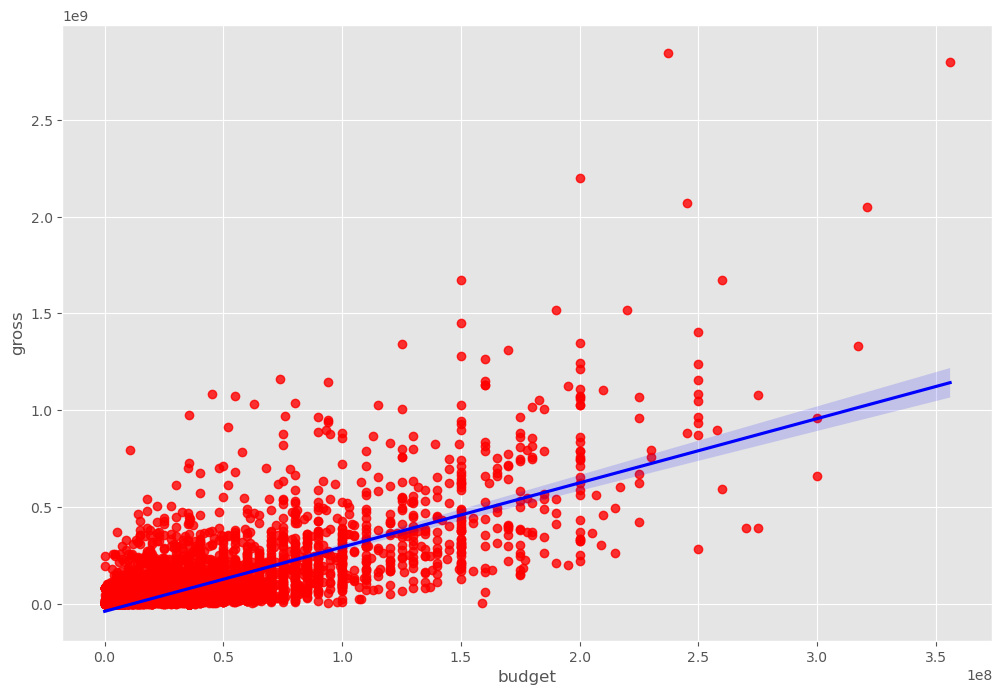

In [11]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [12]:
#Let's start looking at correlation

df.corr() #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.098278,0.223353,0.267264,0.252438,0.119789
score,0.098278,1.000000,0.409432,0.064169,0.182866,0.399965
votes,0.223353,0.409432,1.000000,0.420949,0.628744,0.308907
budget,0.267264,0.064169,0.420949,1.000000,0.711729,0.265121
gross,0.252438,0.182866,0.628744,0.711729,1.000000,0.241296
runtime,0.119789,0.399965,0.308907,0.265121,0.241296,1.000000


In [ ]:
### High correlation between budget and gross
###

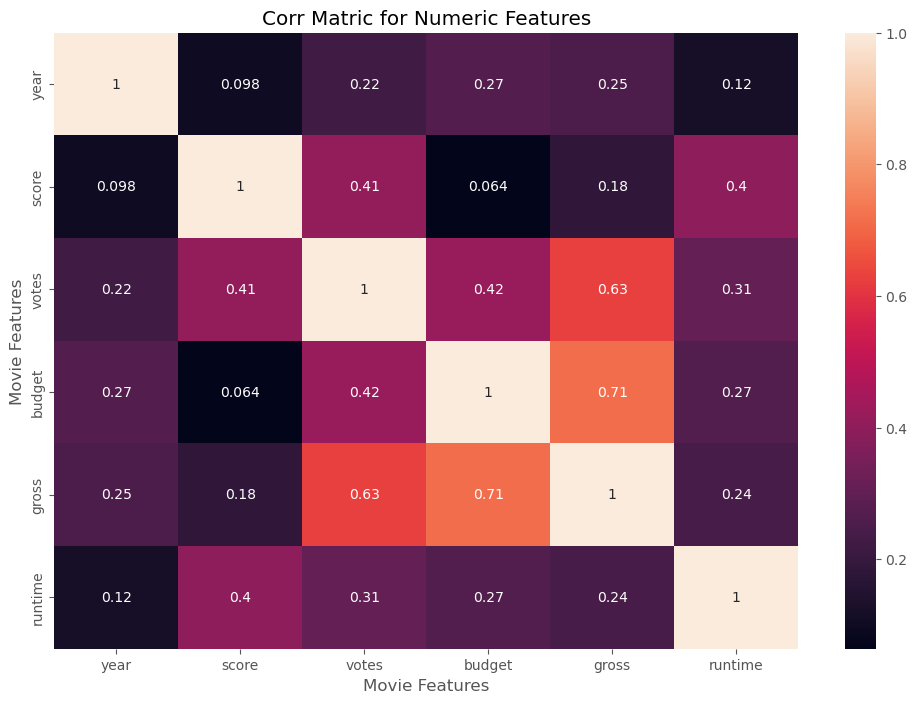

In [13]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Corr Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [14]:
# Look at Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [17]:
# Transfer string to category (biến chuỗi thành số)

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,532,5,0,2009,693,7.8,1100000,1153,1774,2324,55,237000000,2847246203,2246,162.0
7445,534,5,0,2019,181,8.4,903000,162,739,2231,55,356000000,2797501328,1599,181.0
3045,6873,5,6,1997,701,7.8,1100000,1153,1774,1587,55,200000000,2201647264,2246,194.0
6663,5128,5,0,2015,695,7.8,876000,1123,2541,520,55,245000000,2069521700,1533,138.0
7244,535,5,0,2018,190,8.4,897000,162,739,2231,55,321000000,2048359754,1599,149.0


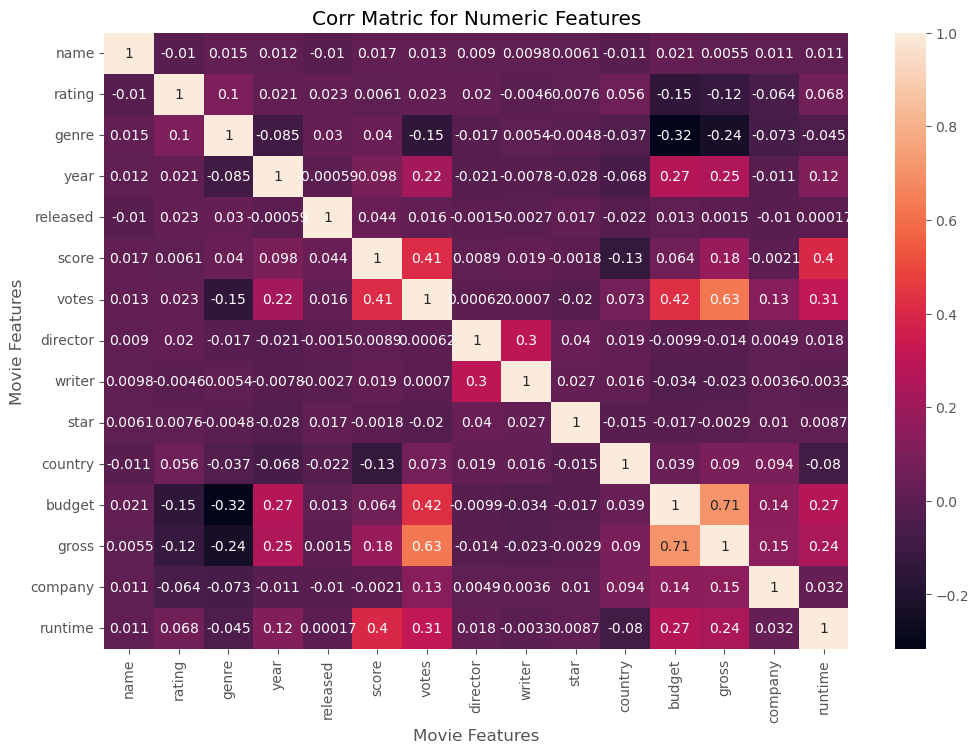

In [18]:
# Heatmap after numerized all features

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Corr Matric for All Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [19]:
#

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.010077
          genre       0.015231
          year        0.011931
          released   -0.010470
          score       0.016603
          votes       0.013239
          director    0.008970
          writer      0.009833
          star        0.006140
          country    -0.011042
          budget      0.020791
          gross       0.005516
          company     0.010557
          runtime     0.010673
rating    name       -0.010077
          rating      1.000000
          genre       0.103570
          year        0.020620
          released    0.023248
          score       0.006065
          votes       0.022866
          director    0.019501
          writer     -0.004631
          star        0.007618
          country     0.055747
          budget     -0.151148
          gross      -0.122879
          company    -0.063628
          runtime     0.067660
genre     name        0.015231
          rating      0.103570
        

In [20]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre     budget     -0.315727
budget    genre      -0.315727
genre     gross      -0.237938
gross     genre      -0.237938
budget    rating     -0.151148
rating    budget     -0.151148
votes     genre      -0.150201
genre     votes      -0.150201
country   score      -0.133115
score     country    -0.133115
gross     rating     -0.122879
rating    gross      -0.122879
genre     year       -0.084693
year      genre      -0.084693
country   runtime    -0.080025
runtime   country    -0.080025
company   genre      -0.072765
genre     company    -0.072765
country   year       -0.068436
year      country    -0.068436
company   rating     -0.063628
rating    company    -0.063628
genre     runtime    -0.045087
runtime   genre      -0.045087
country   genre      -0.036919
genre     country    -0.036919
writer    budget     -0.033507
budget    writer     -0.033507
year      star       -0.028390
star      year       -0.028390
gross     writer     -0.023203
writer    gross      -0.023203
country 

In [21]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.628744
votes     gross       0.628744
budget    gross       0.711729
gross     budget      0.711729
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
### Votes and budget have the highest correlation to gross earnings

<AxesSubplot:xlabel='gross', ylabel='budget'>

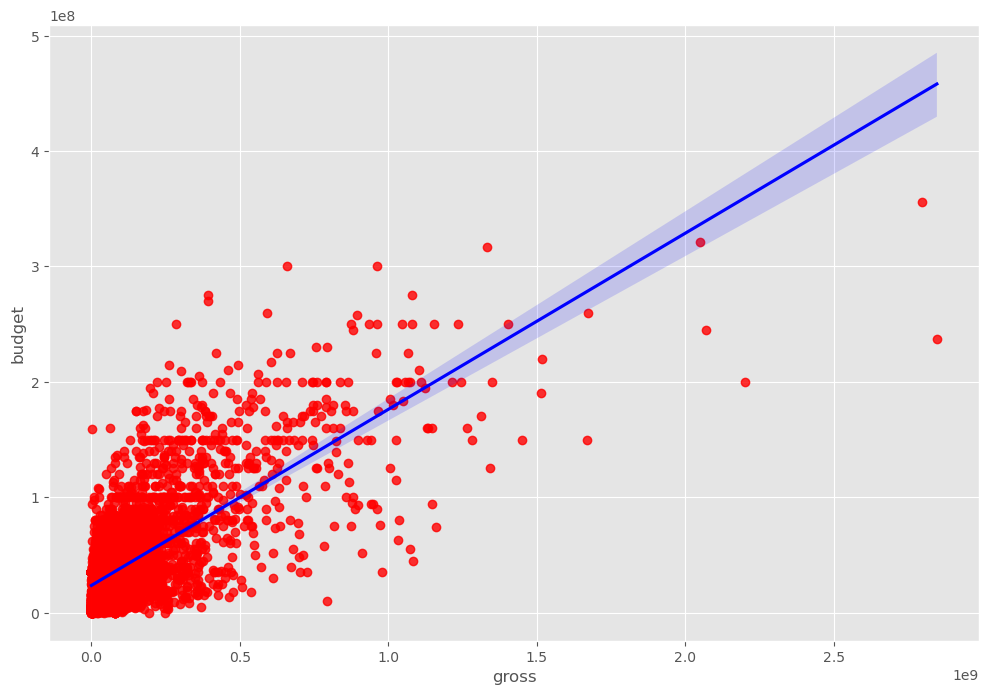

In [27]:
sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<AxesSubplot:xlabel='score', ylabel='gross'>

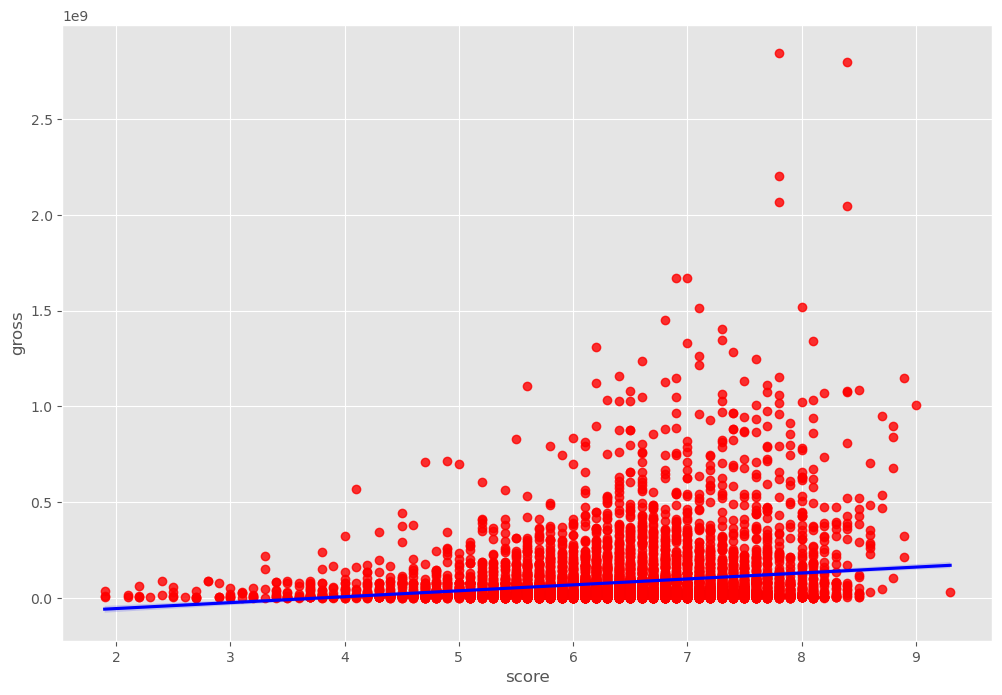

In [28]:
sns.regplot(x="score", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

/Users/namhuynh/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 45.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/namhuynh/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/namhuynh/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 88.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/namhuynh/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 85.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/namhuynh/opt/anaconda3/lib/python3.9/

<AxesSubplot:xlabel='rating', ylabel='gross'>

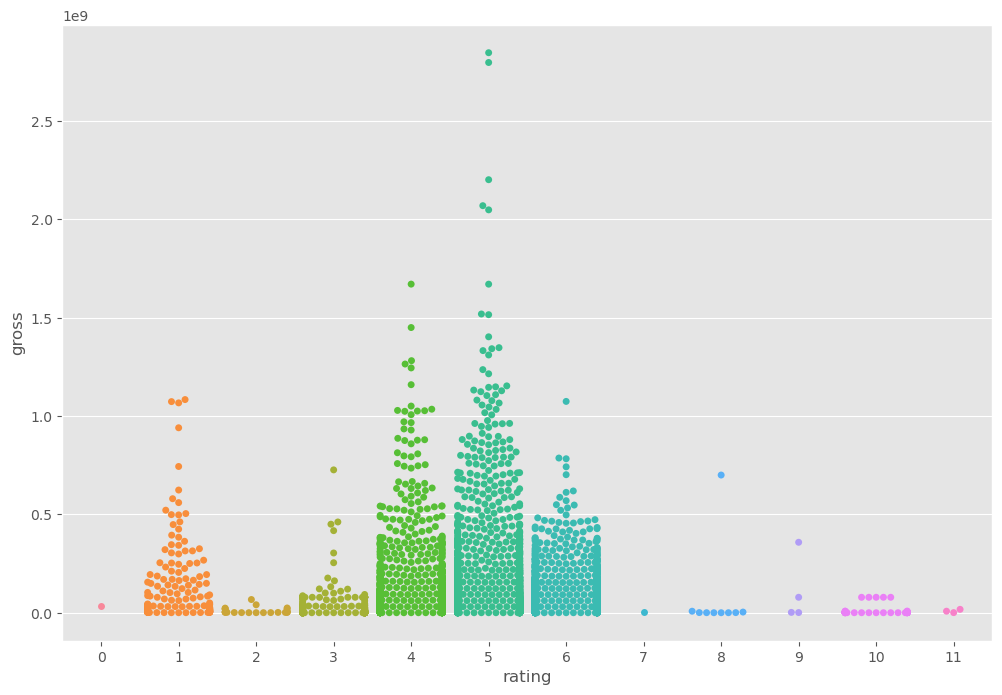

In [25]:
sns.swarmplot(x="rating", y="gross", data=df)

<AxesSubplot:xlabel='rating', ylabel='gross'>

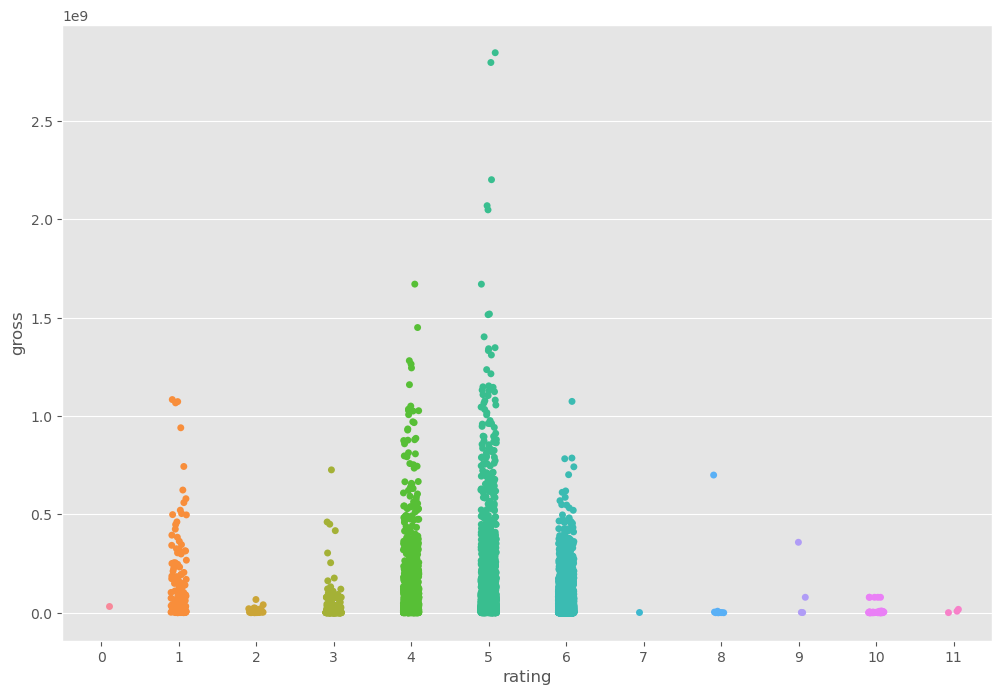

In [26]:
sns.stripplot(x="rating", y="gross", data=df)